# 04 - Data Preprocessing

In [2]:
# Dealing with Missing Data
import pandas as pd
from io import StringIO
# Create a sample dataframe which contains some missing data in some columns
# unicode is only needed for python 2.7
csv_data = unicode('''A,B,C,D
            1.0,2.0,3.0,4.0
            5.0,6.0,,8.0
            0.0,11.0,12.0,''')
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [3]:
# check for the total number of null values in each column
print df.isnull().sum()
print ''
# underlying values can be always accessed as a numpy array from a pandas dataframe
print df.values  
print ''
# drops the rows having null values
print df.dropna()
print ''
# to drop the columns with null values
print df.dropna(axis=1)
print ''
df.dropna(how='all') # drop all rows where all columns are NAN
df.dropna(thresh=4) # have not atleast 4 non-NAN values
df.dropna(subset=['C']) # drop from a particular column

A    0
B    0
C    1
D    1
dtype: int64

[[  1.   2.   3.   4.]
 [  5.   6.  nan   8.]
 [  0.  11.  12.  nan]]

     A    B    C    D
0  1.0  2.0  3.0  4.0

     A     B
0  1.0   2.0
1  5.0   6.0
2  0.0  11.0



,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


### Imputing Missing Values

In [4]:
#imputing missing values
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # strategy can be median or most_frequent, 
# axis = 0 by columns and axis = 1 is by rows.
imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

### Categorical features handling - Ordinal or Nominal

In [5]:
# Categorical features handling - Ordinal or Nominal
import pandas as pd
import numpy as np
df_ord_nom = pd.DataFrame([['green', 'M', 10.1, 'class1'],
            ['red', 'L', 20.1, 'class2'],
            ['blue', 'XL', 30.1, 'class1']])
df_ord_nom.columns = ["color","size","price", "label"]
df_ord_nom

# define a map for the sizes and then convert them to the numberical values
size_mapping = {'M':1, 'L':2, 'XL':3}
df_ord_nom['size'] = df_ord_nom['size'].map(size_mapping)
print df_ord_nom
print ''

# doing the reverse mapping
reverse_mapping_size = {v:k for k,v in size_mapping.items()}
df_ord_nom['size'] = df_ord_nom['size'].map(reverse_mapping_size)
print df_ord_nom
print ''

   color  size  price   label
0  green     1   10.1  class1
1    red     2   20.1  class2
2   blue     3   30.1  class1

   color size  price   label
0  green    M   10.1  class1
1    red    L   20.1  class2
2   blue   XL   30.1  class1



In [6]:
# convert class labels to numerical values
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_ord_nom['label']))}
df_ord_nom['label'] = df_ord_nom['label'].map(class_mapping)
print df_ord_nom
print ''

#doing the reverse class conversion
reverse_class_mapping = {v:k for k,v in class_mapping.items()}
df_ord_nom['label'] = df_ord_nom['label'].map(reverse_class_mapping)
print df_ord_nom
print ''

   color size  price  label
0  green    M   10.1      0
1    red    L   20.1      1
2   blue   XL   30.1      0

   color size  price   label
0  green    M   10.1  class1
1    red    L   20.1  class2
2   blue   XL   30.1  class1



In [7]:
# the same thing can be achieved by using Sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df_ord_nom['label'] = class_le.fit_transform(df_ord_nom['label'])
print df_ord_nom
df_ord_nom['label'] = class_le.inverse_transform(df_ord_nom['label'])
print df_ord_nom

   color size  price  label
0  green    M   10.1      0
1    red    L   20.1      1
2   blue   XL   30.1      0
   color size  price   label
0  green    M   10.1  class1
1    red    L   20.1  class2
2   blue   XL   30.1  class1


### perform One-hot encoding

In [8]:
# perform one-hot encoding
X = df_ord_nom[['color','size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
print X

# instead use the one-hot encoding technique to transform the color column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0]) # can use sparse=False if the toarray() need to be removed
ohe.fit_transform(X).toarray()
print X

# pandas get_dummies only converts the string values to a one hot encoding values
# pd.get_dummies(df_ord_nom[['price','color','size']])

[[1 'M' 10.1]
 [2 'L' 20.1]
 [0 'XL' 30.1]]


ValueError: could not convert string to float: XL

### Partitioning the Dataset into train and test - Wine DataSet

In [9]:
#Partition the dataset into train and test
df_wine = pd.read_csv('/Users/tkmacl9/Desktop/Patents_Research_Papers_Personalization/All_Machine_Learning/wine_UCI.csv', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print np.unique(df_wine['Class label'])
print df_wine.head()

[1 2 3]
   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                        

In [10]:
from sklearn.cross_validation import train_test_split
# iloc provides the specific columns to be picked up
X = df_wine.iloc[:,1:].values
y = df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(124, 13)
(54, 13)
(124,)
(54,)


### Bringing Features to the same scale - Normalization and Standardization

In [11]:
# Bringing Features to the same scale - Normalization and Standardization
# This is the Normalization - MinMaxScaler which uses the min max scaling 
from sklearn.preprocessing import MinMaxScaler
stdsc = MinMaxScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print X_train_std[:4,:2]
print ''
print X_test_std[:4,:2]

[[ 0.72043011  0.20378151]
 [ 0.31989247  0.08403361]
 [ 0.60215054  0.71218487]
 [ 0.57258065  0.56302521]]

[[ 0.72849462  0.16386555]
 [ 0.47311828  0.37394958]
 [ 0.36021505  0.05042017]
 [ 0.68010753  0.17647059]]


In [12]:
# Bringing Features to the same scale - Normalization and Standardization
# This is the Normalization - which uses the min max scaling 
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print X_train_std[:4,:2]
print ''
print X_test_std[:4,:2]

[[ 0.91083058 -0.46259897]
 [-0.95609928 -0.96608672]
 [ 0.35952243  1.67501572]
 [ 0.22169539  1.0478643 ]]

[[ 0.94841977 -0.63042822]
 [-0.24190464  0.25288364]
 [-0.76815332 -1.10741662]
 [ 0.72288462 -0.57742951]]


### Selecting Meaningful Features

In [13]:
# LR intercept runs one vs all classifiers for the 3 classes
# LR coefficients generate weights for all 13 wine featurs for all the 3 classes
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std,y_train)
print('Training Accuracy : ', lr.score(X_train_std, y_train))
print('Test Accuracy : ', lr.score(X_test_std, y_test))
print ''
print lr.intercept_
print ''
print lr.coef_

('Training Accuracy : ', 0.9838709677419355)
('Test Accuracy : ', 0.98148148148148151)

[-0.38381476 -0.15808554 -0.70041641]

[[ 0.28000519  0.          0.         -0.02801136  0.          0.
   0.70994937  0.          0.          0.          0.          0.
   1.23668991]
 [-0.64396499 -0.06879514 -0.0571979   0.          0.          0.          0.
   0.          0.         -0.92679601  0.0602283   0.         -0.37106703]
 [ 0.          0.06148941  0.          0.          0.          0.
  -0.63611527  0.          0.          0.49815076 -0.35820596 -0.57115259
   0.        ]]


### Regulaization Parameter effect on weights trained from a LR model

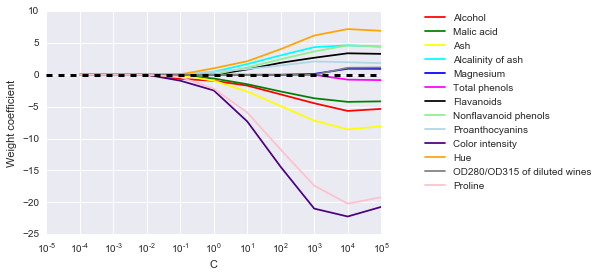

In [14]:
# We can see as the regularization parameter lambda increases or the reciprocal C reduces the weights move to 

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['red','green','yellow', 'cyan', 'blue', 'magenta', 'black', 'lightgreen', 
          'lightblue', 'indigo','orange', 'gray', 'pink']
weights, params = [] , []
for c in np.arange(-4,6):
    lr = LogisticRegression(C= 10**c, penalty='l1', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(np.arange(weights.shape[1]), colors):
    # column +1 is used to exclude the class label column which is column number 1
    plt.plot(params, weights[:,column], label=df_wine.columns[column+1], color=color)    
plt.axhline(y=0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("Weight coefficient")
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38,1.03), ncol=1, fancybox = True)
plt.show()

### Write code for Sequential Backward Selection - SBS feature Selection

In [15]:
# Define methods and a class with variables
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    # define all the class variables and initialize them to the variables passed in the constructor
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
     
    # This is where the main function of SBS lies, including train-test split and to select
    # the features based on the calc_score method in a backward selection method.
    def fit(self, X,y):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1] # number of columns
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self.calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self.calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
        
    # The transform method is used to slice and choose only the columns passed in the indices for the SBS algorithm
    def transform(self, X):
        return X[:, self.indices_]

    # The calc_score method uses the defined scoring method to find the accuracy metric , between the predicted and the
    # test labels.
    def calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test,y_pred)
        return score    
    
    

In [16]:
# Code to call the class methods
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x1129d9ea8>

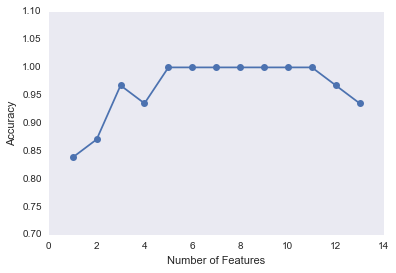

In [18]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()
plt.show()

### Feature Selection using RandomForestClassifier or GBTClassifier

In [19]:
# use the Feature_importances method in RandomForest or GBT to find the most important features
from sklearn.ensemble import RandomForestClassifier
features = df_wine.columns[1:]
print features
rf = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
feat_imp = rf.feature_importances_
print feat_imp
indices = np.argsort(feat_imp)[::-1]
print indices

# feat_imp_new = pd.Series(rf.feature_importances_, features).sort_values(ascending=False)
# print feat_imp_new

Index([u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash', u'Magnesium',
       u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')
[ 0.1075935   0.02551781  0.01230594  0.0315895   0.02217103  0.05474934
  0.14942834  0.01659257  0.02376072  0.17600389  0.07522384  0.14080546
  0.16425808]
[ 9 12  6 11  0 10  5  3  1  8  4  7  2]


0 Color intensity 0.176003888654
1 Proline 0.164258075298
2 Flavanoids 0.149428341916
3 OD280/OD315 of diluted wines 0.140805462228
4 Alcohol 0.107593496583
5 Hue 0.0752238352222
6 Total phenols 0.0547493377353
7 Alcalinity of ash 0.0315894965721
8 Malic acid 0.0255178069686
9 Proanthocyanins 0.0237607156663
10 Magnesium 0.0221710340535
11 Nonflavanoid phenols 0.0165925709013
12 Ash 0.0123059382005


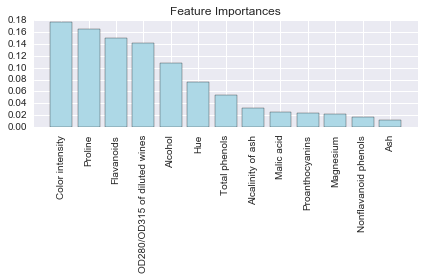

In [20]:
for f in range(X_train.shape[1]):
    print f, features[indices[f]], feat_imp[indices[f]]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feat_imp[indices], color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]), features[indices] , rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.tight_layout()
plt.show()

In [219]:
X_selected = rf.transform(X_train, threshold=0.15)
X_selected.shape

/Users/tkmacl9/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 2)

In [235]:
from itertools import combinations
indices = tuple(range(13))
for p in combinations(indices , r=12):
    print p

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


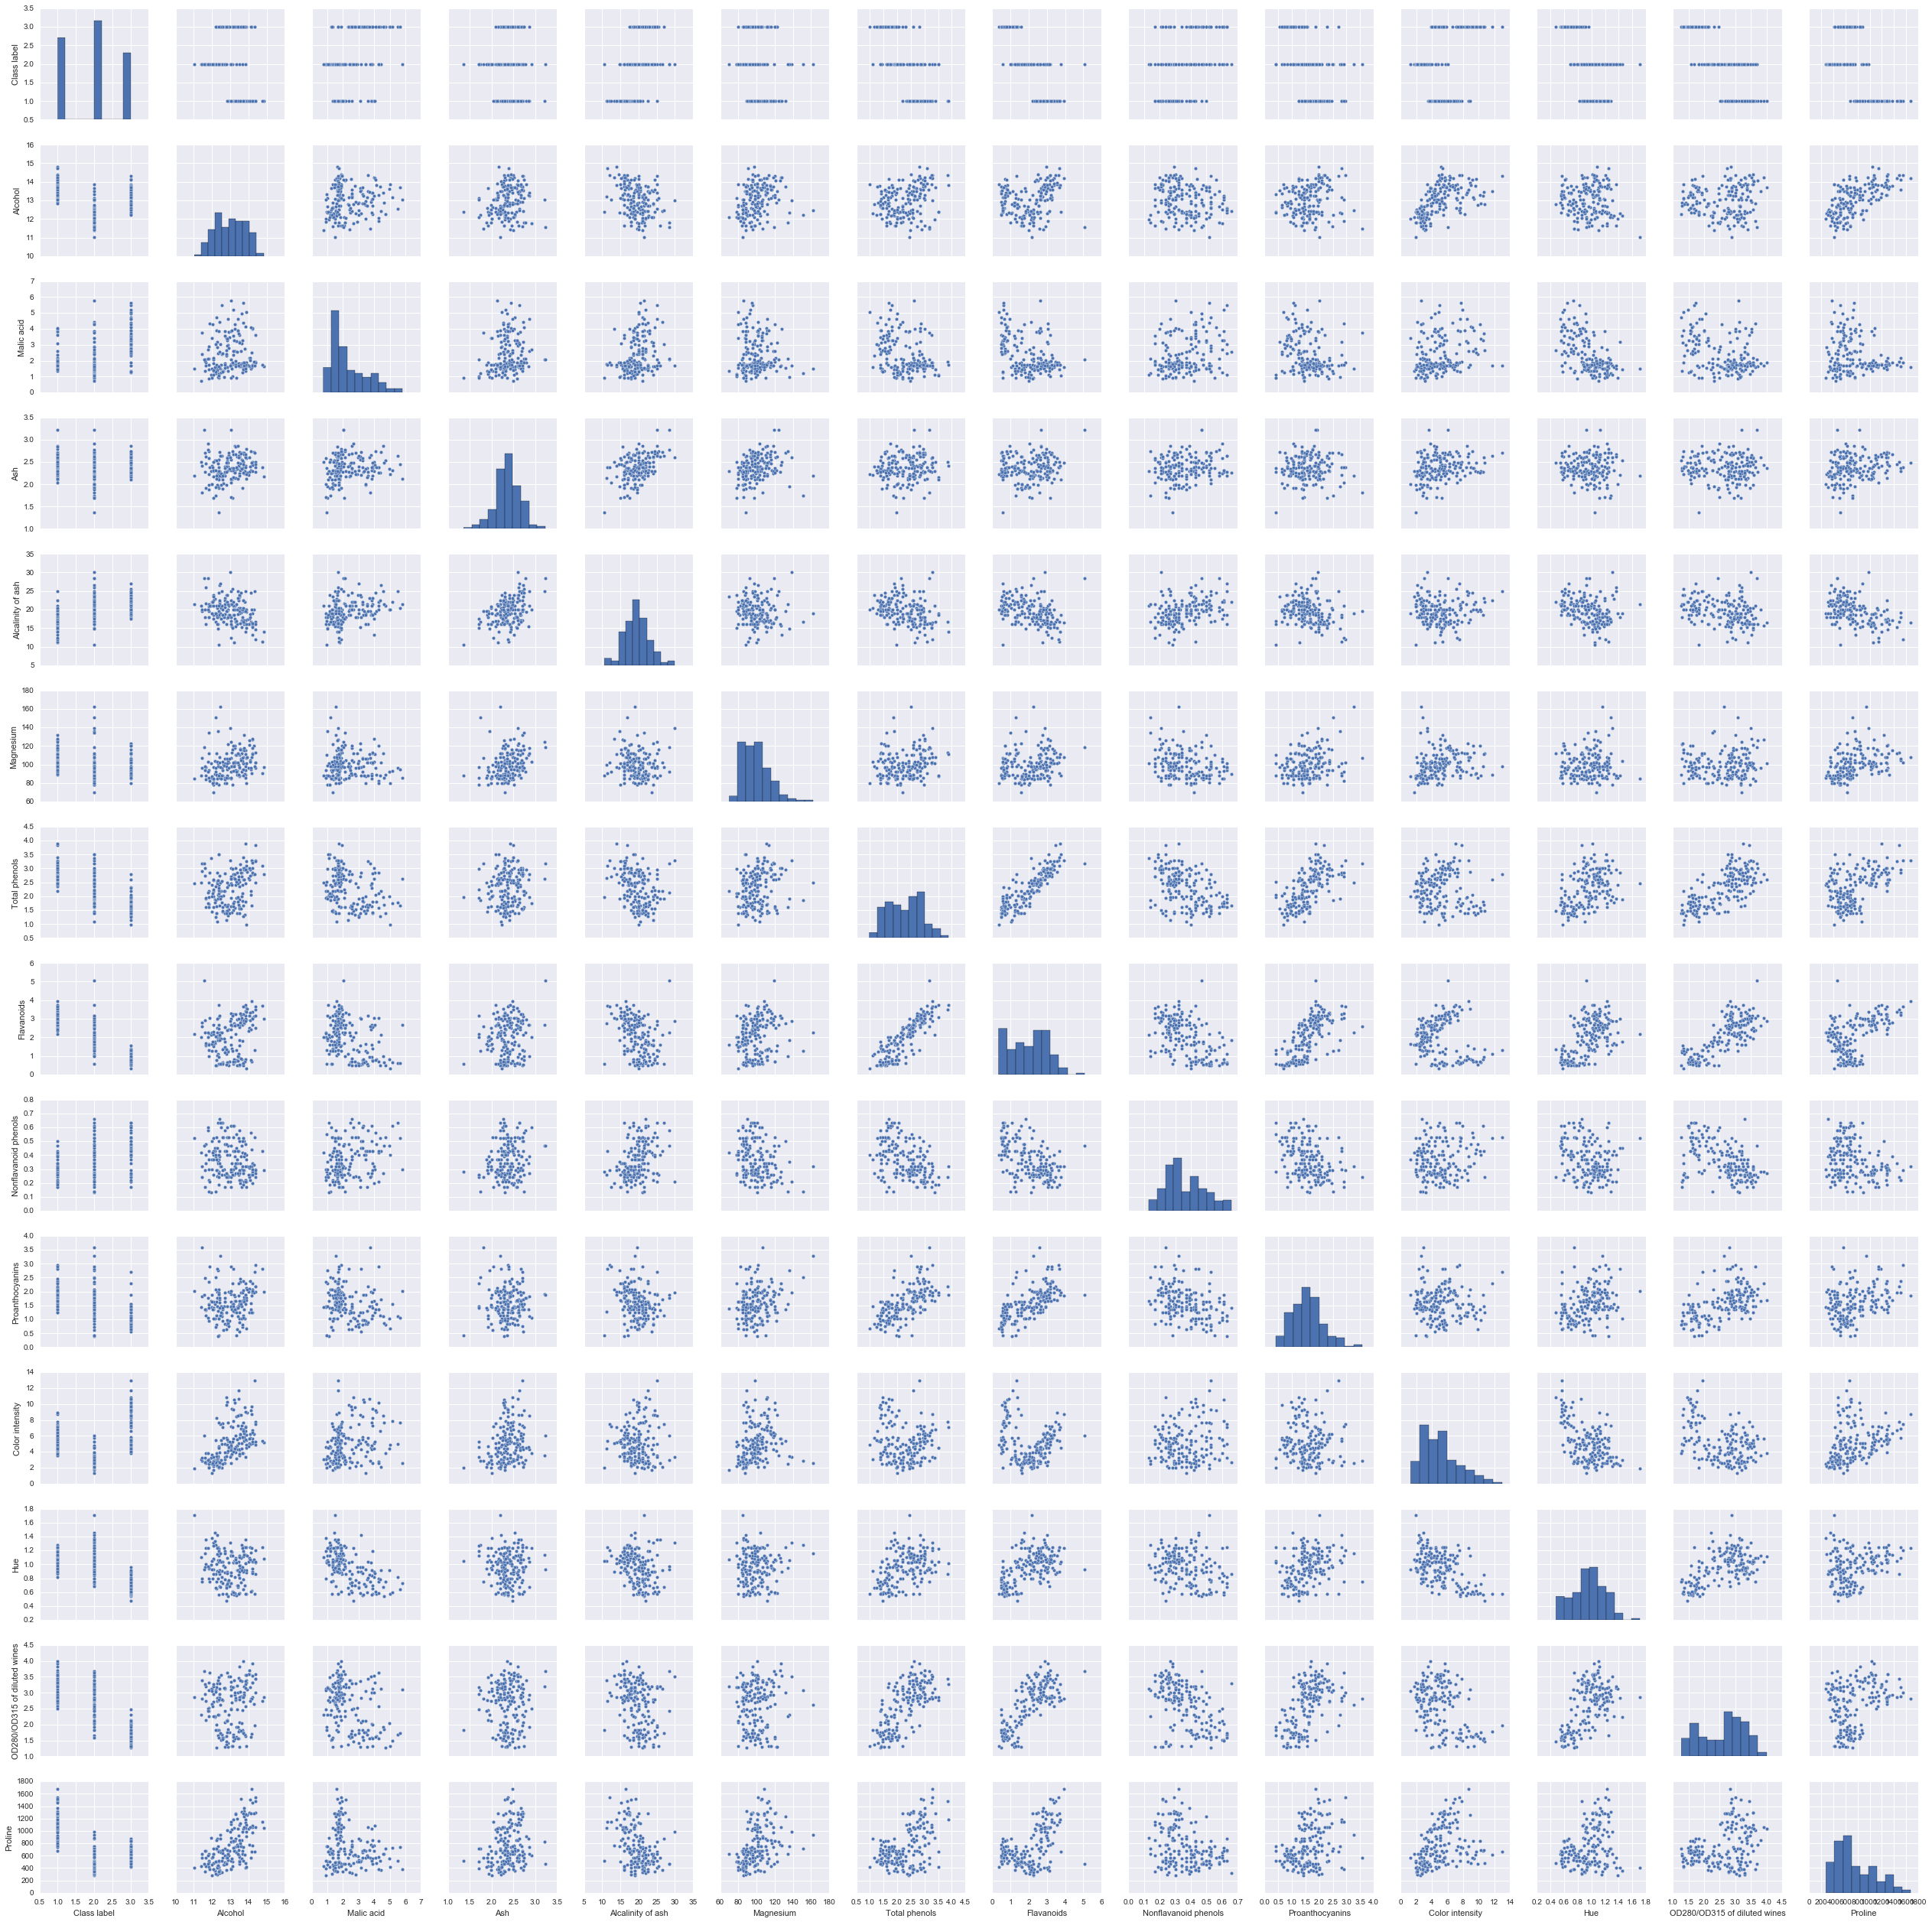

In [25]:
import seaborn as sns
sns.pairplot(df_wine)